In [70]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/big_table.csv')
test = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/2021-22_skaters.csv')

In [53]:
df

,Unnamed: 0,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,S,S%,TOI,ATOI,Player ID
0,0,1,Ramzi Abid\abidra01,25,ATL,LW,6,0,2,2,1,6,0.1,0,6,0.0,49,8:10,1
1,1,2,Craig Adams\adamscr01,28,CAR,RW,67,10,11,21,1,51,1.6,8,68,14.7,824,12:18,2
2,2,3,Kevyn Adams\adamske01,31,CAR,C,82,15,8,23,0,36,1.8,13,160,9.4,1057,12:53,3
3,3,4,Dmitry Afanasenkov\afanadm01,25,TBL,LW,68,9,6,15,-7,16,1.0,8,78,11.5,662,9:44,4
4,4,5,Maxim Afinogenov\afinoma01,26,BUF,RW,77,22,51,73,6,84,7.4,11,241,9.1,1258,16:20,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13689,908,909,Mika Zibanejad\zibanmi01,27,NYR,C,56,24,26,50,2,18,5.7,12,171,14.0,1126,20:06,1651
13690,909,910,Radim Zohorna\zohorra01,24,PIT,F,8,2,2,4,4,4,0.6,2,8,25.0,72,9:02,2778
13691,910,911,Artem Zub\zubar01,25,OTT,D,47,3,11,14,4,26,2.8,3,39,7.7,864,18:23,2779
13692,911,912,Mats Zuccarello\zuccama01,33,MIN,LW,42,11,24,35,9,8,3.9,8,74,14.9,701,16:41,1536


# RFR

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
encoder = ce.OrdinalEncoder(cols=['Tm', 'Pos'])

df = encoder.fit_transform(df)
df.head(3)

,Unnamed: 0,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,S,S%,TOI,ATOI,Player ID
0,0,1,Ramzi Abid\abidra01,25,1,1,6,0,2,2,1,6,0.1,0,6,0.0,49,8:10,1
1,1,2,Craig Adams\adamscr01,28,2,2,67,10,11,21,1,51,1.6,8,68,14.7,824,12:18,2
2,2,3,Kevyn Adams\adamske01,31,2,3,82,15,8,23,0,36,1.8,13,160,9.4,1057,12:53,3


In [55]:
df = df.drop(columns=['Unnamed: 0','Rk','ATOI'])
#df = df.drop('Player', axis=1)

In [56]:
df.head()

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,S,S%,TOI,Player ID
0,Ramzi Abid\abidra01,25,1,1,6,0,2,2,1,6,0.1,0,6,0.0,49,1
1,Craig Adams\adamscr01,28,2,2,67,10,11,21,1,51,1.6,8,68,14.7,824,2
2,Kevyn Adams\adamske01,31,2,3,82,15,8,23,0,36,1.8,13,160,9.4,1057,3
3,Dmitry Afanasenkov\afanadm01,25,3,1,68,9,6,15,-7,16,1.0,8,78,11.5,662,4
4,Maxim Afinogenov\afinoma01,26,4,2,77,22,51,73,6,84,7.4,11,241,9.1,1258,5


In [10]:
X = df.drop(['PTS','Player ID','G','A'], axis=1)
y = df['PTS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=420)

rfr = RandomForestRegressor(n_estimators = 100,max_depth = 5,random_state=420)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=420)

In [11]:
# Predict Test Results
y_pred = rfr.predict(X_test)

# Check accuracy
from sklearn.metrics import r2_score

print("Model accuracy score with 10 decision-trees: {0:0.4f}".format(r2_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees: 0.9543


In [12]:
y_pred = rfr.predict(X_train)
print("Model accuracy score with 10 decision-trees: {0:0.4f}".format(r2_score(y_train, y_pred)))

Model accuracy score with 10 decision-trees: 0.9582


In [13]:
feature_scores = pd.Series(rfr.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

S      0.731938
PS     0.202158
Pos    0.057677
S%     0.004456
TOI    0.001594
EV     0.001239
+/-    0.000932
GP     0.000005
Age    0.000000
Tm     0.000000
PIM    0.000000
dtype: float64

In [14]:
df['Player ID'].value_counts()

691     16
125     16
432     16
535     16
88      16
        ..
1006     1
1003     1
998      1
997      1
2779     1
Name: Player ID, Length: 2779, dtype: int64

In [77]:
#def load_data():
 #   return pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/good_tables/2016-17_skaters_2.csv')

def remove_rows(df):
    """ 
    remove rows without enough data (games played < 10)
    """
    df = df[df['GP'] > 9]    # play with this -- initially setting to 10 because of rookie contract cutoffs, maybe increase to 20 (25% of season) for sample size 
    return df

def points_per_game(df):
    # simple points per game 
    #df['Pts per Game'] = round(df[f'PTS {n}']/df['Games Played'], 3)
    df['Pts per Game'] = round(df['PTS']/df['GP'], 3)
    return df

def points_per_60(df):
    # calculating points per 60 mins -- player production that isn't dependent on TOI bottleneck 
    df['P/60'] = round(df['PTS'] * 60 / df['TOI'], 3)    
    return df

def avg_toi(df):
    df['Avg TOI'] = round(df['TOI']/df['GP'], 3)
    return df

In [79]:
#df = (df
#      .pipe(remove_rows)
#      .pipe(points_per_game)
#      .pipe(points_per_60)
#      .pipe(avg_toi)
#     )
test = (test
        .pipe(remove_rows)
        .pipe(points_per_game)
        .pipe(points_per_60)
        .pipe(avg_toi)
     )

C:\Users\seanl\AppData\Local\Temp\ipykernel_5280\3331905156.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pts per Game'] = round(df['PTS']/df['GP'], 3)
C:\Users\seanl\AppData\Local\Temp\ipykernel_5280\3331905156.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P/60'] = round(df['PTS'] * 60 / df['TOI'], 3)
C:\Users\seanl\AppData\Local\Temp\ipykernel_5280\3331905156.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [68]:
df.to_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/big_table.csv')

In [84]:
#df = df.drop(columns=['Unnamed: 0', 'Rk', 'ATOI'])

In [91]:
#df = df.drop('Unnamed: 0', axis=1)
df

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,S,S%,TOI,Player ID,Pts per Game,P/60,Avg TOI
0,Craig Adams\adamscr01,28,CAR,RW,67,10,11,21,1,51,1.6,8,68,14.7,824,2,0.313,1.529,12.299
1,Kevyn Adams\adamske01,31,CAR,C,82,15,8,23,0,36,1.8,13,160,9.4,1057,3,0.280,1.306,12.890
2,Dmitry Afanasenkov\afanadm01,25,TBL,LW,68,9,6,15,-7,16,1.0,8,78,11.5,662,4,0.221,1.360,9.735
3,Maxim Afinogenov\afinoma01,26,BUF,RW,77,22,51,73,6,84,7.4,11,241,9.1,1258,5,0.948,3.482,16.338
4,Tommy Albelin\albelto01,41,NJD,D,36,0,6,6,4,2,1.6,0,15,0.0,503,6,0.167,0.716,13.972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11749,Trevor Zegras\zegratr01,19,ANA,C,24,3,10,13,6,12,1.4,3,53,5.7,370,2777,0.542,2.108,15.417
11750,Mika Zibanejad\zibanmi01,27,NYR,C,56,24,26,50,2,18,5.7,12,171,14.0,1126,1651,0.893,2.664,20.107
11751,Artem Zub\zubar01,25,OTT,D,47,3,11,14,4,26,2.8,3,39,7.7,864,2779,0.298,0.972,18.383
11752,Mats Zuccarello\zuccama01,33,MIN,LW,42,11,24,35,9,8,3.9,8,74,14.9,701,1536,0.833,2.996,16.690


In [94]:
#test = test.drop(columns=['Rk','ATOI', 'FOW','FO%'])
#test = test.drop(columns=['BLK', 'HIT'])
test.to_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/test_set.csv')

# a

In [20]:
encoder = ce.OrdinalEncoder(cols=['Tm', 'Pos'])

df = encoder.fit_transform(df)
df.head(3)

,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,S,S%,TOI,Player ID,Pts per Game,P/60,Avg TOI
1,28,1,1,67,10,11,21,1,51,1.6,8,68,14.7,824,2,0.313,1.529,12.299
2,31,1,2,82,15,8,23,0,36,1.8,13,160,9.4,1057,3,0.280,1.306,12.890
3,25,2,3,68,9,6,15,-7,16,1.0,8,78,11.5,662,4,0.221,1.360,9.735


In [23]:
X = df.drop(['PTS','G','A'], axis=1)
y = df['PTS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=69)

rfr = RandomForestRegressor(n_estimators = 100,max_depth = 5,random_state=69)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=69)

In [24]:
# Predict Test Results
y_pred = rfr.predict(X_test)
print("Model accuracy score with 10 decision-trees: {0:0.4f}".format(r2_score(y_test, y_pred)))

y_pred = rfr.predict(X_train)
print("Model accuracy score with 10 decision-trees: {0:0.4f}".format(r2_score(y_train, y_pred)))

Model accuracy score with 10 decision-trees: 0.9822
Model accuracy score with 10 decision-trees: 0.9832


In [25]:
feature_scores = pd.Series(rfr.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Pts per Game    0.727211
S               0.117851
PS              0.101185
GP              0.036732
TOI             0.016768
P/60            0.000254
Age             0.000000
Tm              0.000000
Pos             0.000000
+/-             0.000000
PIM             0.000000
EV              0.000000
S%              0.000000
Player ID       0.000000
Avg TOI         0.000000
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

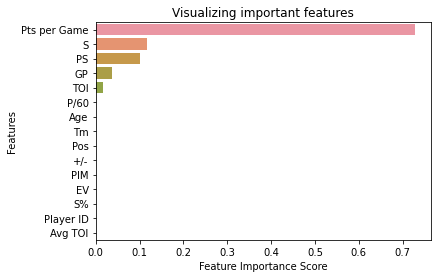

In [26]:
# Creating sns bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing important features")

plt.show

In [28]:
X = df.drop(["A",'PTS','Avg TOI','Player ID','S%','EV','PIM','+/-','Pos','Tm','G','Age','P/60','Pts per Game','S','PS'], axis=1)
y = df['PTS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=73)

rfr = RandomForestRegressor(n_estimators = 100,max_depth = 5,random_state=73)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=73)

In [29]:
# Predict Test Results
y_pred = rfr.predict(X_test)
print("Model accuracy score with 10 decision-trees: {0:0.4f}".format(r2_score(y_test, y_pred)))

y_pred = rfr.predict(X_train)
print("Model accuracy score with 10 decision-trees: {0:0.4f}".format(r2_score(y_train, y_pred)))

Model accuracy score with 10 decision-trees: 0.5656
Model accuracy score with 10 decision-trees: 0.5824


In [30]:
feature_scores = pd.Series(rfr.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

TOI    0.951651
GP     0.048349
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

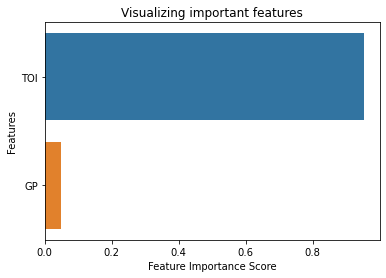

In [31]:
# Creating sns bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing important features")

plt.show

# B

In [32]:
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
data = df#.drop('Player', axis=1)

In [37]:
values = data
data

,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,S,S%,TOI,Player ID,Pts per Game,P/60,Avg TOI
1,28,1,1,67,10,11,21,1,51,1.6,8,68,14.7,824,2,0.313,1.529,12.299
2,31,1,2,82,15,8,23,0,36,1.8,13,160,9.4,1057,3,0.280,1.306,12.890
3,25,2,3,68,9,6,15,-7,16,1.0,8,78,11.5,662,4,0.221,1.360,9.735
4,26,3,1,77,22,51,73,6,84,7.4,11,241,9.1,1258,5,0.948,3.482,16.338
5,41,4,4,36,0,6,6,4,2,1.6,0,15,0.0,503,6,0.167,0.716,13.972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13688,19,32,2,24,3,10,13,6,12,1.4,3,53,5.7,370,2777,0.542,2.108,15.417
13689,27,23,2,56,24,26,50,2,18,5.7,12,171,14.0,1126,1651,0.893,2.664,20.107
13691,25,6,4,47,3,11,14,4,26,2.8,3,39,7.7,864,2779,0.298,0.972,18.383
13692,33,26,3,42,11,24,35,9,8,3.9,8,74,14.9,701,1536,0.833,2.996,16.690


In [38]:
X = values.drop('PTS', axis=1)
y = np.array(values['PTS'])
# Z = np.array(test['PTS']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=11)

reg = LinearRegression()
reg.fit(X_train, y_train)


print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))

Train R2: 1.0
Test R2: 1.0


In [46]:
X = values.drop(columns=['PTS','G','A'])
y = np.array(values['PTS'])
# Z = np.array(test['PTS']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=11)

reg = LinearRegression()
reg.fit(X_train, y_train)


print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))

Train R2: 0.9738137288180511
Test R2: 0.9752010593166195


In [40]:
X = np.array(values['Player ID']).reshape(-1,1)
y = np.array(values['PTS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=11)

reg = LinearRegression()
reg.fit(X_train, y_train)


print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))

Train R2: 0.027881231359025538
Test R2: 0.0267142654757202


(0.0, 125.0)

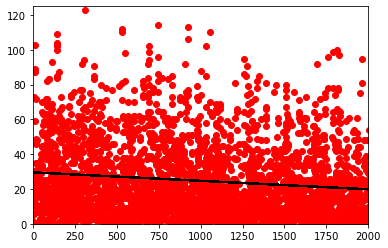

In [41]:
X = np.array(values['Player ID'])
y = np.array(values['PTS'])

coef = np.polyfit(X,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(X_test,y_test, 'ro', X_test, poly1d_fn(X_test), '-k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(0, 2000)
plt.ylim(0, 125)

In [49]:
y_pred = reg.predict(X_test)

In [50]:
print('Coefficients:', reg.coef_)
print("Intercept:", reg.intercept_)
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R2): %.2f' % r2_score(y_test, y_pred))

Coefficients: [ 8.36826335e-03 -1.04418940e-03 -2.64404335e-01  4.07819626e-02
 -9.64990755e-02 -1.08716982e-02  1.74219427e+00  4.26049072e-01
  1.26899881e-02 -2.02430704e-01  1.18034188e-02 -9.64619257e-05
  6.80603925e+01 -6.57448199e+00 -1.46078823e+00]
Intercept: 10.45939581640371
Mean squared error (MSE): 10.76
Coefficient of determination (R2): 0.98


C:\Users\seanl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

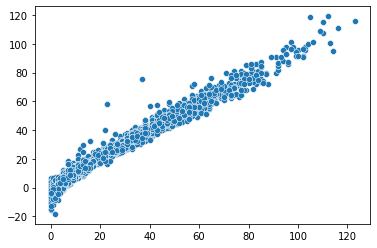

In [51]:
sns.scatterplot(y_test, y_pred)